#***INSTALLING LIBRARIES***#

In [1]:
! pip install requests
! pip install beautifulsoup4
! pip install --pre scapy[basic]
! pip install pythonping
! pip install ip2geotools

import requests
from bs4 import BeautifulSoup
import urllib.request
import json
from pythonping import ping
import socket
from ip2geotools.databases.noncommercial import DbIpCity
from geopy.distance import distance
from urllib.parse import urlparse
from scapy.all import *
import csv

Exception in thread Thread-5 (attachment_entry):
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/debugpy/server/api.py", line 237, in listen
    sock, _ = endpoints_listener.accept()
  File "/usr/lib/python3.10/socket.py", line 293, in accept
    fd, addr = self._accept()
TimeoutError: timed out

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/google/colab/_debugpy.py", line 52, in attachment_entry
    debugpy.listen(_dap_port)
  File "/usr/local/lib/python3.10/dist-packages/debugpy/public_api.py", line 31, in wrapper
    return wrapped(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/debugpy/server/api.py", line 143, in debug
    log.reraise

#***FINDING MY INFO***#

In [2]:
api='https://api.ipify.org' # This line assigns the URL of the ipify API to the variable api. This API is used to fetch the public IP address of the vm

ip=urllib.request.urlopen(api).read().decode('UTF-8') #This line opens the URL specified by api using urlopen(), reads the data from it using read(),
#and then decodes the bytes into a string using decode('UTF-8'). This retrieves the public IP address

print(f'My IP is:{ip}')

info = json.loads(urllib.request.urlopen('http://ip-api.com/json/'+ip).read())#This line constructs a URL using the public IP address and queries
#the ip-api.com service to retrieve information about that IP address in JSON format. It then reads the response, decodes it from bytes to a string,
#and parses the JSON string into a Python dictionary using json.loads(), storing the result in the variable info.

#print(info)
print(f'My city is: {info["city"]}')
print(f'My country is: {info["country"]}')
print(f'My latitude is: {info["lat"]}')
print(f'My longitude is: {info["lon"]}')

My IP is:35.202.153.197
My city is: Council Bluffs
My country is: United States
My latitude is: 41.2619
My longitude is: -95.8608


#***EXTRACT THE URLS FROM THE WEBSITE***#

In [3]:
URL = "https://www.debian.org/mirror/list#complete-list"
page = requests.get(URL)#This line uses the requests module to send an HTTP GET request to the URL specified by URL,
#and it stores the response in the variable page.

soup = BeautifulSoup(page.content, "html.parser")#This line creates a BeautifulSoup object soup from the HTML content of the page.
#It uses the "html.parser" parser to parse the HTML content.
urls= []

#Find all <a> tags
links = soup.find_all('a')

# extract for each link the value of the href attribute (the URL) and append it to the urls list.
for link in links:

  link_url = link["href"]

  urls.append(link_url)

# drop not useful lines
urls = urls[13:376]
print(len(urls))

print(urls)

for i in range(len(urls)):

  # Analize the URL
  parsed_url = urlparse(urls[i])

  # Extract the host from the url
  url = parsed_url.netloc
  urls[i] = url

print(urls)



363
['http://ftp.am.debian.org/debian/', 'http://ftp.au.debian.org/debian/', 'http://ftp.at.debian.org/debian/', 'http://ftp.by.debian.org/debian/', 'http://ftp.be.debian.org/debian/', 'http://ftp.br.debian.org/debian/', 'http://ftp.bg.debian.org/debian/', 'http://ftp.ca.debian.org/debian/', 'http://ftp.cl.debian.org/debian/', 'http://ftp.cn.debian.org/debian/', 'http://ftp.hr.debian.org/debian/', 'http://ftp.cz.debian.org/debian/', 'http://ftp.dk.debian.org/debian/', 'http://ftp.fi.debian.org/debian/', 'http://ftp.fr.debian.org/debian/', 'http://ftp2.de.debian.org/debian/', 'http://ftp.de.debian.org/debian/', 'http://ftp.hk.debian.org/debian/', 'http://ftp.is.debian.org/debian/', 'http://ftp.it.debian.org/debian/', 'http://ftp.jp.debian.org/debian/', 'http://ftp.kr.debian.org/debian/', 'http://ftp.lt.debian.org/debian/', 'http://ftp.md.debian.org/debian/', 'http://ftp.nl.debian.org/debian/', 'http://ftp.nc.debian.org/debian/', 'http://ftp.nz.debian.org/debian/', 'http://ftp.no.debian.

In [4]:
#take a subset of urls
urls = urls[:50]
len(urls)

50

#***FINDING IP ADDRESSES***#

In [5]:
# save into the list 'indirizzi' all the ip addresses
indirizzi = []
for i in range(len(urls)):
  target = urls[i]
  target_ip = socket.gethostbyname(target)
  indirizzi.append(target_ip)
print(indirizzi)



['93.187.162.100', '103.84.224.37', '213.129.232.18', '82.209.230.71', '195.234.45.114', '200.236.31.3', '130.89.148.12', '64.50.233.100', '138.204.231.113', '45.125.0.6', '161.53.160.11', '78.128.211.127', '130.225.254.116', '194.71.11.163', '212.27.32.66', '137.226.34.46', '141.76.2.4', '45.125.0.6', '78.129.164.123', '85.94.199.210', '150.65.7.130', '103.22.220.133', '158.129.159.169', '178.17.160.48', '130.89.149.21', '103.2.186.81', '163.7.134.112', '129.240.118.47', '153.19.251.221', '130.89.148.12', '85.143.112.112', '195.80.174.186', '213.129.232.18', '130.89.148.12', '194.71.11.163', '129.132.53.171', '140.110.240.80', '193.140.98.183', '78.129.164.123', '64.50.236.52', '200.14.116.3', '93.187.162.100', '93.187.162.100', '103.84.224.37', '101.0.120.90', '202.158.214.106', '122.252.2.42', '103.1.215.35', '103.84.224.37', '139.5.127.195']


#***CALCULATING RTT***#

In [6]:
import statistics
RTT = {}

n = 3

for i in range(len(indirizzi)):

  rtt= []

  #For each IP address, is used the DbIpCity.get() method to perform IP geolocation,
  #retrieving information such as the city associated with the IP address.
  target = indirizzi[i]
  res = DbIpCity.get(target, api_key="free")

  # Create an ICMP packet with the destination set to the current IP address being processed.
  target = indirizzi[i]
  pck = IP(dst=target)/ICMP()
  #pck.show()

  #this loop is used to calculate the average rtt over n values
  for k in range(n):
    ans, unans = sr(pck,verbose=False, timeout = 1)
    #print(ans.summary())

    if ans is not None and len(ans) > 0:
      query = ans[0][0]
      resp = ans[0][1]
      #print(resp.show())
      rtt.append(resp.time-query.sent_time)

  if len(rtt) > 0:
    print(f'RTT is {statistics.mean(rtt)*1000} ms')
    RTT[res.city]=(statistics.mean(rtt))

print(RTT)
len(RTT)


RTT is 188.5379950205485 ms
RTT is 193.1312084197998 ms
RTT is 127.41692860921225 ms
RTT is 107.2860558827718 ms
RTT is 143.06330680847168 ms
RTT is 102.66613960266113 ms
RTT is 38.572072982788086 ms
RTT is 141.00845654805502 ms
RTT is 169.3441073099772 ms
RTT is 126.1435349782308 ms
RTT is 117.20848083496094 ms
RTT is 124.87077713012695 ms
RTT is 127.32378641764322 ms
RTT is 102.49121983846028 ms
RTT is 115.62355359395345 ms
RTT is 122.7417786916097 ms
RTT is 169.30747032165527 ms
RTT is 97.8093147277832 ms
RTT is 126.47652626037598 ms
RTT is 154.0393034617106 ms
RTT is 176.81487401326498 ms
RTT is 147.03448613484701 ms
RTT is 102.84010569254558 ms
RTT is 194.47636604309082 ms
RTT is 190.7949447631836 ms
RTT is 119.61619059244792 ms
RTT is 124.4819164276123 ms
RTT is 102.57808367411296 ms
RTT is 135.60907046000162 ms
RTT is 121.6431458791097 ms
RTT is 127.81659762064615 ms
RTT is 102.59056091308594 ms
RTT is 127.15411186218262 ms
RTT is 120.15676498413086 ms
RTT is 99.78437423706055 m

33

Here can be seen that not all the server are responding, in fact given a subset of 50 servers is possible to calculate the rtt just for a subset of them

***VERIFY THE CORRECTNESS OF THE RTT VALUES***

These lines can be used in order to evaluate the correctness of the rtt values previously calculated

In [7]:
! apt-get install iputils-ping >/dev/null

In [8]:
! ping 213.129.232.18

PING 213.129.232.18 (213.129.232.18) 56(84) bytes of data.
64 bytes from 213.129.232.18: icmp_seq=1 ttl=56 time=128 ms
64 bytes from 213.129.232.18: icmp_seq=2 ttl=56 time=127 ms
64 bytes from 213.129.232.18: icmp_seq=3 ttl=56 time=128 ms
64 bytes from 213.129.232.18: icmp_seq=4 ttl=56 time=128 ms
64 bytes from 213.129.232.18: icmp_seq=5 ttl=56 time=127 ms
64 bytes from 213.129.232.18: icmp_seq=6 ttl=56 time=127 ms
64 bytes from 213.129.232.18: icmp_seq=7 ttl=56 time=128 ms
64 bytes from 213.129.232.18: icmp_seq=8 ttl=56 time=127 ms
64 bytes from 213.129.232.18: icmp_seq=9 ttl=56 time=128 ms
64 bytes from 213.129.232.18: icmp_seq=10 ttl=56 time=128 ms
64 bytes from 213.129.232.18: icmp_seq=11 ttl=56 time=127 ms
64 bytes from 213.129.232.18: icmp_seq=12 ttl=56 time=127 ms
64 bytes from 213.129.232.18: icmp_seq=13 ttl=56 time=127 ms
64 bytes from 213.129.232.18: icmp_seq=14 ttl=56 time=128 ms
64 bytes from 213.129.232.18: icmp_seq=15 ttl=56 time=128 ms
64 bytes from 213.129.232.18: icmp_

#***CREATE DICTIONARIES CONTAINING COORDINATES AND DISTANCES***#

In [9]:
coordinates = {}
distances = {}
information={}

for i in range(len(indirizzi)):

  ip = indirizzi[i]
  res = DbIpCity.get(ip, api_key="free")

  #This line stores the latitude and longitude coordinates for the city obtained from the IP geolocation in the coordinates dictionary.
  coordinates[res.city] = (res.latitude,res.longitude)

  #This line calculates the distance between the city's coordinates and the coordinates of the location where the virtual machine is located
  #using the distance() function and stores it in the distances dictionary.
  distances[res.city] = distance(coordinates[res.city],(info["lat"],info["lon"]))

  #If the city exists in both dictionaries, it retrieves the distance and RTT values
  #and stores them in the information dictionary as a tuple (distance, RTT)
  if res.city in distances and res.city in RTT:

    distanza = distances[res.city]
    rtt = RTT[res.city]
    information[res.city] = (distanza, rtt)


coordinates = {j:k for j,k in coordinates.items() if k[0]!=None and k[1] != None} #cancel elements for which coordinates cannot be calculated

print(information)
len(information)
#print(distances)
#print(coordinates)

{'Yerevan (Kanakerr-Zeytun)': (Distance(10502.202166986723), 0.1811223030090332), 'Sydney': (Distance(14186.501534817202), 0.17932256062825522), 'Vienna (Ottakring)': (Distance(8071.858423690541), 0.12781659762064615), 'Sint-Truiden': (Distance(7264.69364347876), 0.1072860558827718), 'Curitiba (Centro)': (Distance(8810.51679078213), 0.14306330680847168), 'Amsterdam': (Distance(7148.056326280777), 0.10259056091308594), 'New York': (Distance(1835.2667481330202), 0.038572072982788086), 'Valparaíso': (Distance(8595.019154990992), 0.14100845654805502), 'Hong Kong': (Distance(12318.66479105421), 0.16930747032165527), 'Zagreb': (Distance(8231.302250728902), 0.1261435349782308), 'Prague': (Distance(7826.364411718596), 0.11720848083496094), 'Copenhagen': (Distance(7331.316304465499), 0.12487077713012695), 'Umeå': (Distance(7083.1599013150735), 0.12715411186218262), 'Paris': (Distance(7221.433833264982), 0.10249121983846028), 'Aachen (Mitte)': (Distance(7320.353335773452), 0.11562355359395345), 

33

#***CREATE A CSV FILE CONTAINING THE DISTANCES (OPTIONAL)***#

In [10]:
# Name of the csv file
file_name = 'Data.csv'

# List of dictionary's keys (CSV file header)
header = list(coordinates.keys())

# List of dictionary's values
values = list(coordinates.values())

#open the CSV file in writing mode and create an object 'writer'
with open(file_name, 'w', newline='') as file_csv:

    writer = csv.writer(file_csv)
    # write the header in the CSV file
    writer.writerow(header)

    # write values in the csv file
    writer.writerow(values)

print(f"The dictionary has been saved in the csv file '{file_name}'.")


The dictionary has been saved in the csv file 'Data.csv'.


#***SORT DISTANCES IN AN INCREASING ORDER***#

In [11]:
# sort distances an increase order
new_information =  sorted(information.items(), key=lambda x: x[1])

# print sorted distances
for res.city, distance in new_information:

    print(f"{res.city}: {distance}")

Chicago: (Distance(690.0807229261211), 0.02158633867899577)
New York: (Distance(1835.2667481330202), 0.038572072982788086)
Maidenhead: (Distance(6877.502412417539), 0.09978437423706055)
Oslo: (Distance(6958.139702656777), 0.11961619059244792)
Umeå: (Distance(7083.1599013150735), 0.12715411186218262)
Amsterdam: (Distance(7148.056326280777), 0.10259056091308594)
Paris: (Distance(7221.433833264982), 0.10249121983846028)
Sint-Truiden: (Distance(7264.69364347876), 0.1072860558827718)
Aachen (Mitte): (Distance(7320.353335773452), 0.11562355359395345)
Copenhagen: (Distance(7331.316304465499), 0.12487077713012695)
Zurich (Zürich (Kreis 1) / Hochschulen): (Distance(7691.139949632872), 0.12015676498413086)
Dresden (Südvorstadt-West): (Distance(7721.504407432981), 0.1227417786916097)
Gdansk: (Distance(7723.0718642676065), 0.1244819164276123)
Prague: (Distance(7826.364411718596), 0.11720848083496094)
Milan: (Distance(7864.102405454132), 0.12647652626037598)
Vienna (Ottakring): (Distance(8071.85842

#***PLOT***#

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

Distanze: [690.0807229261211, 1835.2667481330202, 6877.502412417539, 6958.139702656777, 7083.1599013150735, 7148.056326280777, 7221.433833264982, 7264.69364347876, 7320.353335773452, 7331.316304465499, 7691.139949632872, 7721.504407432981, 7723.0718642676065, 7826.364411718596, 7864.102405454132, 8071.858423690541, 8143.06319797855, 8231.302250728902, 8394.58401653828, 8595.019154990992, 8807.377352776122, 8810.51679078213, 9127.14242102947, 9775.039168033301, 10336.487974431986, 10502.202166986723, 12232.08766782485, 12318.66479105421, 12814.411682092068, 13669.97831805658, 13671.046242290096, 14186.501534817202, 14189.916883240765]
RTT: [21.58633867899577, 38.572072982788086, 99.78437423706055, 119.61619059244792, 127.15411186218262, 102.59056091308594, 102.49121983846028, 107.2860558827718, 115.62355359395345, 124.87077713012695, 120.15676498413086, 122.7417786916097, 124.4819164276123, 117.20848083496094, 126.47652626037598, 127.81659762064615, 121.6431458791097, 126.1435349782308,

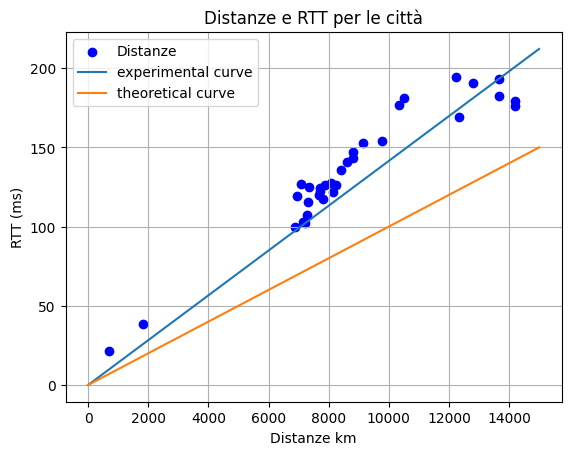

In [13]:
#These lines extract the distances (in kilometers) from the new_information list.
#The distances are then stored in the list valori_distanze
distanze = [tupla[1][0] for tupla in new_information]
valori_distanze = [d.km for d in distanze]

#This line extracts the RTT values (in milliseconds) from the new_information list and multiplies
#each value by 1000 to convert them to milliseconds. The RTT values are then stored in the list rtt.
rtt = [tupla[1][1]*1000 for tupla in new_information]

print("Distanze:", valori_distanze)
print("RTT:", rtt)

# Create the plot
#plt.figure(figsize=(10, 6))

#Plot distances and rtt
plt.scatter(valori_distanze, rtt, marker='o', color='blue', label='Distanze')

#fit a linear regression line to the data points using NumPy's polyfit() function.
#It then plots this regression line using plt.plot().
coeff = np.polyfit(valori_distanze, rtt,deg=1)
max_distance = 15_000
plt.plot( [0, max_distance], [0, coeff[1] + coeff[0]*max_distance], label='experimental curve') #sono il primo e l'ultimo punto della retta
plt.plot( [0, max_distance], [0, 2*max_distance/200], label='theoretical curve')#200 is the value of the light velocity in the fiber in km/ms

plt.xlabel('Distanze km')
plt.ylabel('RTT (ms)')

# Legend
plt.legend(loc='upper left')

# Show the plot
plt.title('Distanze e RTT per le città')
plt.grid(True)
plt.show()


***COMMENT ON THE FINAL RESULT***

The Estimated RTT is smaller than the measured one. This is due to the fact that estimation does not consider the presence of a network but see the connection as a single end to end long fiber optic cable. The queuing and processing time of each hop in the path and the path topology are not considered and this justifies the difference between the two Round Trip Times.

Despite this, the trend of the measured RTT is linear as the theoretical one.